## Big 5 Personality Traits and Psychographic Profiling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from factor_analyzer import FactorAnalyzer
from factor_analyzer import (ConfirmatoryFactorAnalyzer, ModelSpecificationParser)


## Cleaning Data:

In [2]:
df=pd.read_csv('data.txt')

In [3]:
df.shape

(19719, 57)

In [4]:
df.columns

Index(['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5',
       'A6', 'A7', 'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C9', 'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9',
       'O10'],
      dtype='object')

In [5]:
df.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


In [6]:
df.describe()

,race,age,engnat,gender,hand,source,E1,E2,E3,E4,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
count,19719.000000,1.971900e+04,19719.000000,19719.000000,19719.000000,19719.00000,19719.000000,19719.000000,19719.000000,19719.000000,...,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000
mean,5.324205,5.076703e+04,1.365130,1.616918,1.130128,1.95228,2.628937,2.759724,3.416755,3.152036,...,3.692479,2.149653,4.126122,2.079416,3.873016,1.794766,4.072975,3.208023,4.133577,4.004767
std,4.019064,7.121272e+06,0.488796,0.499122,0.413663,1.50477,1.232565,1.313818,1.236820,1.222822,...,1.116302,1.135227,1.006806,1.109751,0.939655,1.068513,0.923595,1.258921,0.982868,0.983729
min,0.000000,1.300000e+01,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.800000e+01,1.000000,1.000000,1.000000,1.00000,2.000000,2.000000,3.000000,2.000000,...,3.000000,1.000000,4.000000,1.000000,3.000000,1.000000,4.000000,2.000000,4.000000,3.000000
50%,3.000000,2.200000e+01,1.000000,2.000000,1.000000,1.00000,3.000000,3.000000,4.000000,3.000000,...,4.000000,2.000000,4.000000,2.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000
75%,8.000000,3.100000e+01,2.000000,2.000000,1.000000,2.00000,4.000000,4.000000,4.000000,4.000000,...,5.000000,3.000000,5.000000,3.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000
max,13.000000,1.000000e+09,2.000000,3.000000,3.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
df.columns

Index(['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5',
       'A6', 'A7', 'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C9', 'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9',
       'O10'],
      dtype='object')

In [7]:
df2=df.copy()

In [8]:
df2=df2.drop(['race','age', 'engnat', 'gender','hand','source','country'], axis =1)

In [9]:
df2_names=df2.columns

In [10]:
df2_names

Index(['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2',
       'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4',
       'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6',
       'C7', 'C8', 'C9', 'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8',
       'O9', 'O10'],
      dtype='object')

In [11]:
df2.isna().sum()

E1     0
E2     0
E3     0
E4     0
E5     0
E6     0
E7     0
E8     0
E9     0
E10    0
N1     0
N2     0
N3     0
N4     0
N5     0
N6     0
N7     0
N8     0
N9     0
N10    0
A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
C1     0
C2     0
C3     0
C4     0
C5     0
C6     0
C7     0
C8     0
C9     0
C10    0
O1     0
O2     0
O3     0
O4     0
O5     0
O6     0
O7     0
O8     0
O9     0
O10    0
dtype: int64

 ## Initial Dataset

5 point scale; need to double-check to ensure this survey uses original survey items

In [12]:
df2.head(10)

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,4,2,5,2,5,1,4,3,5,1,...,4,1,3,1,5,1,4,2,5,5
1,2,2,3,3,3,3,1,5,1,5,...,3,3,3,3,2,3,3,1,3,2
2,5,1,1,4,5,1,1,5,5,1,...,4,5,5,1,5,1,5,5,5,5
3,2,5,2,4,3,4,3,4,4,5,...,4,3,5,2,4,2,5,2,5,5
4,3,1,3,3,3,1,3,1,3,5,...,3,1,1,1,3,1,3,1,5,3
5,1,5,2,4,1,3,2,4,1,5,...,4,2,1,3,3,5,5,4,5,3
6,5,1,5,1,5,1,5,4,4,1,...,3,1,5,1,4,1,4,3,3,4
7,4,3,5,3,5,1,4,3,4,3,...,3,1,5,1,4,1,5,3,2,5
8,3,1,5,1,5,1,5,2,5,3,...,3,3,5,3,5,1,5,3,4,5
9,1,4,2,5,2,4,1,4,1,5,...,4,2,5,2,4,1,4,3,4,4


In [13]:
corr=df2.corr()
corr.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
E1,1.000000,-0.421009,0.474275,-0.483781,0.479101,-0.346676,0.588100,-0.366534,0.455476,-0.414282,...,0.040614,-0.025262,0.072166,-0.005076,0.185306,-0.094602,0.082905,0.005200,-0.080613,0.163746
E2,-0.421009,1.000000,-0.445537,0.527723,-0.539518,0.570819,-0.479932,0.373481,-0.364713,0.463642,...,-0.054844,0.057705,-0.041386,0.035385,-0.128444,0.104499,-0.057018,-0.020862,0.066212,-0.140338
E3,0.474275,-0.445537,1.000000,-0.481006,0.590660,-0.393412,0.579883,-0.320097,0.423473,-0.473928,...,0.031561,-0.066997,-0.001933,-0.021454,0.164364,-0.077993,0.138130,-0.073237,-0.088141,0.121873
E4,-0.483781,0.527723,-0.481006,1.000000,-0.510068,0.474928,-0.503229,0.446221,-0.450755,0.510477,...,-0.044808,0.097082,0.027307,0.060839,-0.143680,0.089983,-0.073050,0.005843,0.110283,-0.128684
E5,0.479101,-0.539518,0.590660,-0.510068,1.000000,-0.480675,0.630796,-0.344639,0.416147,-0.542389,...,0.090260,-0.069816,0.061337,-0.052182,0.203607,-0.107803,0.123914,0.014990,-0.025336,0.196498


In [15]:
# pyplot.figure(figsize=(10,10))
# sns.heatmap(corr)


## Exploratory Factor Analysis:

In [16]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

Bartlett's test of sphericity tests the hypothesis that your correlation matrix is an identity matrix, which would indicate that your variables are unrelated and therefore unsuitable for structure detection. 

Small values (less than 0.05) of the significance level indicate that a factor analysis may be useful with your data.

In [17]:
chi_square_value,p_value=calculate_bartlett_sphericity(df2)
chi_square_value, p_value

(376900.4076943222, 0.0)

The Kaiser-Meyer-Olkin Measure of Sampling Adequacy is a statistic that indicates the proportion of variance in your variables that might be caused by underlying factors. 

High values (close to 1.0) generally indicate that a factor analysis may be useful with your data. If the value is less than 0.50, the results of the factor analysis probably won't be very useful.

In [18]:
kmo_all,kmo_model=calculate_kmo(df2)
kmo_model


0.9098091720204534

In [19]:
fa = FactorAnalyzer(rotation='varimax')
fa.fit(df2)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [20]:
ev, v = fa.get_eigenvalues()

In [21]:
ev_df=pd.DataFrame(ev)

Checking Eigenvalues:

In [22]:
ev_df.head(10)

,0
0,8.047391
1,4.616352
2,3.748353
3,3.553487
4,2.763512
5,1.581076
6,1.330619
7,1.053632
8,0.966361
9,0.926186


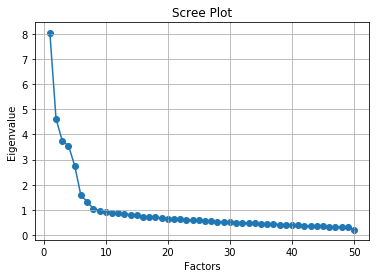

In [23]:
plt.scatter(range(1,df2.shape[1]+1),ev)
plt.plot(range(1,df2.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [24]:
# fa=fa = FactorAnalyzer(rotation="oblimin", n_factors=5)
# fa.fit(df2)

### Fit Model

In [25]:
fa = FactorAnalyzer(rotation="varimax", n_factors=5)
fa.fit(df2)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=5, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [26]:
fa.loadings_

array([[ 6.69996013e-01, -5.66440972e-02,  6.47670105e-02,
         1.03750693e-02,  3.90153298e-02],
       [-6.77326714e-01,  7.35517843e-03, -1.23786424e-01,
         2.70475680e-02, -4.09373384e-02],
       [ 6.50714271e-01, -2.56921510e-01,  2.59347592e-01,
         1.31978887e-01, -1.02800627e-02],
       [-7.01397444e-01,  1.54401340e-01, -5.83387593e-02,
        -2.42742437e-02, -7.83767402e-03],
       [ 7.25810224e-01, -7.95008639e-02,  2.16553796e-01,
         9.98887937e-02,  7.55001932e-02],
       [-5.64382342e-01,  9.35796767e-02, -1.56945111e-01,
        -2.90742336e-02, -2.23752424e-01],
       [ 7.30078427e-01, -1.03411077e-01,  1.62093708e-01,
         4.56119604e-02,  3.40439319e-02],
       [-5.63993272e-01,  3.55849933e-02,  3.46382832e-02,
         6.18185923e-02, -2.88911236e-02],
       [ 6.18287774e-01, -4.27009929e-02, -8.04930786e-03,
        -8.26687128e-03,  1.15450358e-01],
       [-6.42180981e-01,  1.87839647e-01, -6.24283333e-02,
        -2.35969507e-02

In [27]:
fa.get_communalities()

array([0.45792781, 0.47655609, 0.57422301, 0.51985223, 0.59569447,
       0.40282681, 0.57322217, 0.32521075, 0.39756506, 0.45272983,
       0.4927389 , 0.26416912, 0.42630656, 0.13600462, 0.31935924,
       0.57196964, 0.52209978, 0.57302112, 0.53627259, 0.46888996,
       0.19765663, 0.41310733, 0.27443014, 0.61924604, 0.45107899,
       0.37386156, 0.50225257, 0.36359485, 0.51450358, 0.30735046,
       0.38545282, 0.30499691, 0.24127463, 0.44673782, 0.41441796,
       0.37202865, 0.29714946, 0.30248763, 0.40471309, 0.28098437,
       0.35832465, 0.35535989, 0.29904058, 0.25730637, 0.41653372,
       0.2649668 , 0.30159758, 0.32524149, 0.19519849, 0.48077801])

In [28]:
factor_loadings=pd.DataFrame(fa.loadings_)
factor_loadings.index=df2.columns
factor_names=["Extraversion","Neuroticism","Agreeableness","Conscientiousness","Openness"]
factor_loadings.columns=factor_names

In [29]:
factor_loadings[0:10]

,Extraversion,Neuroticism,Agreeableness,Conscientiousness,Openness
E1,0.669996,-0.056644,0.064767,0.010375,0.039015
E2,-0.677327,0.007355,-0.123786,0.027048,-0.040937
E3,0.650714,-0.256922,0.259348,0.131979,-0.010280
E4,-0.701397,0.154401,-0.058339,-0.024274,-0.007838
E5,0.725810,-0.079501,0.216554,0.099889,0.075500
E6,-0.564382,0.093580,-0.156945,-0.029074,-0.223752
E7,0.730078,-0.103411,0.162094,0.045612,0.034044
E8,-0.563993,0.035585,0.034638,0.061819,-0.028891
E9,0.618288,-0.042701,-0.008049,-0.008267,0.115450
E10,-0.642181,0.187840,-0.062428,-0.023597,-0.024404


In [30]:
factor_loadings[10:20]

,Extraversion,Neuroticism,Agreeableness,Conscientiousness,Openness
N1,-0.109800,0.686316,0.063869,-0.021555,-0.071478
N2,0.114255,-0.495081,0.016333,-0.030023,0.069578
N3,-0.138063,0.615567,0.162510,0.042377,-0.010804
N4,0.143536,-0.319757,-0.026781,0.098303,-0.052696
N5,-0.048778,0.536294,-0.021181,-0.113691,-0.126471
N6,-0.061717,0.742160,0.028845,-0.086954,-0.094690
N7,-0.008309,0.701346,-0.076751,-0.155622,-0.005952
N8,-0.020602,0.734001,-0.086199,-0.161347,-0.019393
N9,-0.048323,0.706748,-0.175711,-0.049924,-0.032827
N10,-0.246647,0.613502,-0.038677,-0.166575,0.049262


In [31]:
factor_loadings[20:30]

,Extraversion,Neuroticism,Agreeableness,Conscientiousness,Openness
A1,-0.020357,0.071534,-0.429370,-0.021572,-0.085449
A2,0.343832,-0.056769,0.532098,0.003452,0.092329
A3,0.094700,0.245045,-0.402660,-0.192976,0.077715
A4,0.040557,0.061387,0.781989,0.043956,0.019851
A5,-0.140496,0.022326,-0.655802,0.003271,-0.027470
A6,0.003827,0.151598,0.587389,0.037811,-0.066401
A7,-0.311393,0.102643,-0.626195,-0.008777,-0.050535
A8,0.126001,-0.019461,0.580184,0.092985,0.045610
A9,0.117810,0.111439,0.691568,0.072807,0.068112
A10,0.337254,-0.123264,0.382487,0.152597,0.093989


In [32]:
factor_loadings[30:40]

,Extraversion,Neuroticism,Agreeableness,Conscientiousness,Openness
C1,0.044733,-0.104412,0.013596,0.598824,0.117367
C2,0.051758,0.106214,0.040949,-0.522967,0.125957
C3,-0.031181,0.009296,0.087870,0.405486,0.260914
C4,-0.063342,0.363322,-0.046019,-0.555341,0.014198
C5,0.086143,-0.086466,0.065588,0.622984,-0.084320
C6,-0.000980,0.170190,0.003516,-0.582286,0.063193
C7,-0.043197,0.072796,0.031213,0.536293,0.037413
C8,-0.063609,0.221586,-0.158426,-0.472121,-0.036656
C9,0.058679,0.021834,0.092997,0.625136,-0.036730
C10,0.035921,-0.010321,0.062287,0.472913,0.228170


In [33]:
factor_loadings[40:50]

,Extraversion,Neuroticism,Agreeableness,Conscientiousness,Openness
O1,0.035252,-0.043877,-0.032516,0.045657,0.593308
O2,-0.015200,0.212459,-0.028324,-0.004346,-0.556030
O3,0.035352,0.105723,0.061832,-0.080042,0.525722
O4,0.013652,0.118330,-0.114573,0.063244,-0.475385
O5,0.211363,-0.062298,-0.014451,0.166759,0.583062
O6,-0.101168,0.049057,-0.084777,0.031039,-0.494140
O7,0.081561,-0.132674,-0.002506,0.196083,0.488762
O8,0.000036,0.079363,-0.112483,-0.045916,0.551527
O9,-0.135728,0.168975,0.176076,0.045439,0.339347
O10,0.193353,-0.017253,0.028877,0.050552,0.663103


In [34]:
communalities=pd.DataFrame(fa.get_communalities())

In [60]:
communalities.head()

,0
0,0.457928
1,0.476556
2,0.574223
3,0.519852
4,0.595694


In [36]:
transform_df=pd.DataFrame(fa.transform(df2))

In [37]:
transform_df.head()

,0,1,2,3,4
0,1.047653,-1.873241,0.581457,1.309165,0.405262
1,-0.798516,-0.187778,-0.147856,0.934086,-1.866982
2,0.631752,2.354956,0.130110,2.112927,0.740349
3,-0.567252,1.512766,-0.063708,-0.806577,0.559729
4,0.235765,-0.085769,1.009057,-0.254804,-0.896569


In [38]:
factor_variance = pd.DataFrame(fa.get_factor_variance())
factor_variance.index=['SS','Proportional Variance','Cumulative Variance']

In [39]:
factor_variance

,0,1,2,3,4
SS,4.986259,4.610635,3.766434,3.271882,3.173103
Proportional Variance,0.099725,0.092213,0.075329,0.065438,0.063462
Cumulative Variance,0.099725,0.191938,0.267267,0.332704,0.396166


In [14]:
e_list =df2[["E1","E2", "E3", "E4", "E5", "E6","E7","E8","E9","E10"]]
o_list=df2[["O1", "O2", "O3", "O4", "O5", "O6","O7","O8","O9","O10"]]
a_list=df2[["A1","A2", "A3", "A4", "A5", "A6","A7","A8","A9","A10"]]
test=df2[["A1","E1","C1","O4"]]



In [21]:
# import numpy as np
# def CronbachAlpha(itemscores):
#     itemscores = np.asarray(itemscores)
#     itemvars = itemscores.var(axis=1, ddof=1)
#     tscores = itemscores.sum(axis=0)
#     nitems = len(itemscores)

#     return nitems / (nitems-1.) * (1 - itemvars.sum() / tscores.var(ddof=1))

In [23]:
import numpy as np
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    calpha = nitems / float(nitems-1) * (1 - itemvars.sum() / float(tscores.var(ddof=1)))

    return calpha

In [28]:
CronbachAlpha(a_list)

-0.024244169020314222

In [24]:
CronbachAlpha(e_list)

-0.38993236312297935

In [25]:
CronbachAlpha(o_list)

0.27083602424614966

In [26]:
CronbachAlpha(test)

0.0770364639137863

## Confirmatory Factor Analysis

In [45]:
cfa_dict={}
cfa_dict["Openness"]=["O1", "O2", "O3", "O4", "O5", "O6","O7","O8","O9","O10"]
cfa_dict["Agreeableness"]=["A1","A2", "A3", "A4", "A5", "A6","A7","A8","A9","A10"]
cfa_dict["Extraversion"]=["E1","E2", "E3", "E4", "E5", "E6","E7","E8","E9","E10"]
cfa_dict["Neuroticism"]=["N1","N2", "N3", "N4", "N5", "N6","N7","N8","N9", "N10"]
cfa_dict["Conscientiousness"]=["C1","C2","C3", "C4", "C5", "C6","C7","C8","C9","C10"]

In [46]:
cfa_dict.items()

dict_items([('Openness', ['O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', 'O10']), ('Agreeableness', ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']), ('Extraversion', ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10']), ('Neuroticism', ['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10']), ('Conscientiousness', ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10'])])

In [47]:
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(df2,
cfa_dict)

In [48]:
df2.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,4,2,5,2,5,1,4,3,5,1,...,4,1,3,1,5,1,4,2,5,5
1,2,2,3,3,3,3,1,5,1,5,...,3,3,3,3,2,3,3,1,3,2
2,5,1,1,4,5,1,1,5,5,1,...,4,5,5,1,5,1,5,5,5,5
3,2,5,2,4,3,4,3,4,4,5,...,4,3,5,2,4,2,5,2,5,5
4,3,1,3,3,3,1,3,1,3,5,...,3,1,1,1,3,1,3,1,5,3


In [49]:
cfa = ConfirmatoryFactorAnalyzer(model_spec, disp=False) 


In [50]:
cfa.fit(df2)

ConfirmatoryFactorAnalyzer(bounds=None, disp=False, impute='median',
                           is_cov_matrix=False, max_iter=200, n_obs=19719,
                           specification=<factor_analyzer.confirmatory_factor_analyzer.ModelSpecification object at 0x11f6db9e8>,
                           tol=None)

In [51]:
cfa.loadings_

array([[ 0.97843359,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.8046291 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.07226609,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.93921461,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.05862146,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.73188634,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.30992342,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.68876004,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.91934632,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.90571968,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.02692497,  0.        ,  0.        ,  0.        ],
       [ 0.        , -1.2357876 ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.69538057,  0.        ,  0.        ,  0.        ],
       [ 0.        , -1.00442022,  0. 

In [52]:
cfa_loadings=pd.DataFrame(cfa.loadings_)
cfa_loadings.index=df2.columns
cfa_names=["Extraversion","Neuroticism","Agreeableness","Conscientiousness","Openness"]
cfa_loadings.columns=factor_names

In [53]:
cfa_loadings[0:10]

,Extraversion,Neuroticism,Agreeableness,Conscientiousness,Openness
E1,0.978434,0.0,0.0,0.0,0.0
E2,-0.804629,0.0,0.0,0.0,0.0
E3,1.072266,0.0,0.0,0.0,0.0
E4,-0.939215,0.0,0.0,0.0,0.0
E5,1.058621,0.0,0.0,0.0,0.0
E6,-0.731886,0.0,0.0,0.0,0.0
E7,1.309923,0.0,0.0,0.0,0.0
E8,-0.688760,0.0,0.0,0.0,0.0
E9,0.919346,0.0,0.0,0.0,0.0
E10,-0.905720,0.0,0.0,0.0,0.0


In [54]:
cfa_loadings[10:20]

,Extraversion,Neuroticism,Agreeableness,Conscientiousness,Openness
N1,0.0,1.026925,0.0,0.0,0.0
N2,0.0,-1.235788,0.0,0.0,0.0
N3,0.0,0.695381,0.0,0.0,0.0
N4,0.0,-1.004420,0.0,0.0,0.0
N5,0.0,0.754575,0.0,0.0,0.0
N6,0.0,1.193370,0.0,0.0,0.0
N7,0.0,1.151842,0.0,0.0,0.0
N8,0.0,1.272600,0.0,0.0,0.0
N9,0.0,1.083508,0.0,0.0,0.0
N10,0.0,0.983806,0.0,0.0,0.0


In [55]:
cfa_loadings[20:30]

,Extraversion,Neuroticism,Agreeableness,Conscientiousness,Openness
A1,0.0,0.0,-0.632279,0.0,0.0
A2,0.0,0.0,0.742480,0.0,0.0
A3,0.0,0.0,-0.666840,0.0,0.0
A4,0.0,0.0,1.055277,0.0,0.0
A5,0.0,0.0,-1.120932,0.0,0.0
A6,0.0,0.0,0.897097,0.0,0.0
A7,0.0,0.0,-1.108881,0.0,0.0
A8,0.0,0.0,0.769388,0.0,0.0
A9,0.0,0.0,1.078270,0.0,0.0
A10,0.0,0.0,0.624475,0.0,0.0


In [56]:
cfa_loadings[30:40]

,Extraversion,Neuroticism,Agreeableness,Conscientiousness,Openness
C1,0.0,0.0,0.0,0.878204,0.0
C2,0.0,0.0,0.0,-0.379859,0.0
C3,0.0,0.0,0.0,0.598130,0.0
C4,0.0,0.0,0.0,-0.586407,0.0
C5,0.0,0.0,0.0,0.843068,0.0
C6,0.0,0.0,0.0,-0.509875,0.0
C7,0.0,0.0,0.0,0.813461,0.0
C8,0.0,0.0,0.0,-0.691329,0.0
C9,0.0,0.0,0.0,1.062921,0.0
C10,0.0,0.0,0.0,0.728009,0.0


In [57]:
cfa_loadings[40:50]

,Extraversion,Neuroticism,Agreeableness,Conscientiousness,Openness
O1,0.0,0.0,0.0,0.0,0.945517
O2,0.0,0.0,0.0,0.0,-0.915908
O3,0.0,0.0,0.0,0.0,0.570020
O4,0.0,0.0,0.0,0.0,-0.735503
O5,0.0,0.0,0.0,0.0,0.784406
O6,0.0,0.0,0.0,0.0,-0.939220
O7,0.0,0.0,0.0,0.0,0.545853
O8,0.0,0.0,0.0,0.0,1.049563
O9,0.0,0.0,0.0,0.0,0.278605
O10,0.0,0.0,0.0,0.0,0.884291


In [65]:
CFA_transform=cfa.fit_transform